# This block ensures all required packages are installed in compatible versions, so Our hybrid pipeline (FL + GAN + PCA + SHAP) runs without version errors.

## ==> GANs → Need PyTorch + TorchVision for neural networks.
## ==> PCA → Needs scikit-learn + NumPy for matrix computations.
## ==> FL → Needs flwr (Federated Learning framework) + stable PyTorch.
## ==> XAI (SHAP) → Needs shap + matplotlib + seaborn for explanations.

### ==> What you achieved with the install
-------------------------------------------------

### ==>✅ PyTorch (2.8.0 + CUDA 12.6) → GPU support ready
### ==>TorchVision, Torchaudio → installed fine
### ==>Scikit-learn, Matplotlib, Pandas, OpenCV, Pillow, tqdm → all utilities installed
### ==>Federated Learning (flwr 1.22.0) → confirmed working
### ==>Explainability (SHAP 0.48.0) → installed successfully
### ==>Optional but useful (Albumentations 2.0.8, XGBoost 3.0.5) → installed successfully

In [1]:
# Basic deep learning + utilities
!pip install --upgrade pip
!pip install torch torchvision torchaudio
!pip install scikit-learn matplotlib pillow tqdm opencv-python pandas

# Federated Learning
!pip install flwr

# Explainability
!pip install shap

# Optional / useful
!pip install albumentations xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 39.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 787.9/787.9 kB 25.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 83.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 88.2 MB/s  0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: click
    Found existing installation: click 8.3.1
    Uninstalling click-8.3.1:
      Successfully uninstalled click-8.3.1
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [flwr]
ERROR: 

# Check All Dependices are Installed or Not

In [2]:
import torch, torchvision, torchaudio
import sklearn, matplotlib, PIL, tqdm, cv2, pandas
import flwr, shap, albumentations, xgboost

print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)
print("Torchaudio:", torchaudio.__version__)

print("Scikit-learn:", sklearn.__version__)
print("Matplotlib:", matplotlib.__version__)
print("PIL:", PIL.__version__)
print("TQDM:", tqdm.__version__)
print("OpenCV:", cv2.__version__)
print("Pandas:", pandas.__version__)

print("Flower (FLWR):", flwr.__version__)
print("SHAP:", shap.__version__)
print("Albumentations:", albumentations.__version__)
print("XGBoost:", xgboost.__version__)


Torch: 2.9.0+cu126
Torchvision: 0.24.0+cu126
Torchaudio: 2.9.0+cu126
Scikit-learn: 1.6.1
Matplotlib: 3.10.0
PIL: 11.3.0
TQDM: 4.67.1
OpenCV: 4.12.0
Pandas: 2.2.2
Flower (FLWR): 1.24.0
SHAP: 0.50.0
Albumentations: 2.0.8
XGBoost: 3.1.2


## Upload two ZIP files:




In [3]:
# =========================
# Step 1: Upload & Extract Dataset
# =========================
from google.colab import files

uploaded = files.upload()

Saving Epic and CSCR hospital Dataset.zip to Epic and CSCR hospital Dataset.zip


# Extract them to separate folders

In [4]:
import zipfile

for filename in uploaded.keys():
    foldername = filename.split('.')[0].replace(' ', '_').lower() + "_dataset"
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall(foldername)
    print(f"✅ Extracted {filename} to {foldername}")

✅ Extracted Epic and CSCR hospital Dataset.zip to epic_and_cscr_hospital_dataset_dataset


#Inspect extracted folders

In [5]:
import os

# Automatically list all *_dataset folders
dataset_folders = [d for d in os.listdir() if d.endswith('_dataset') and os.path.isdir(d)]

for folder in dataset_folders:
    print(f"\n📁 Inspecting: {folder}")
    for root, dirs, files in os.walk(folder):
        print("📂", root)
        for file in files[:5]:
            print("   └──", file)



📁 Inspecting: epic_and_cscr_hospital_dataset_dataset
📂 epic_and_cscr_hospital_dataset_dataset
📂 epic_and_cscr_hospital_dataset_dataset/Epic and CSCR hospital Dataset
📂 epic_and_cscr_hospital_dataset_dataset/Epic and CSCR hospital Dataset/Test
📂 epic_and_cscr_hospital_dataset_dataset/Epic and CSCR hospital Dataset/Test/meningioma
   └── M_79_HF_.jpg
   └── 1519.jpg
   └── M_816.jpg
   └── 1460.jpg
   └── M_795_HF_.jpg
📂 epic_and_cscr_hospital_dataset_dataset/Epic and CSCR hospital Dataset/Test/pituitary
   └── 1519.jpg
   └── p (453).jpg
   └── 1406.jpg
   └── 1460.jpg
   └── p (388).jpg
📂 epic_and_cscr_hospital_dataset_dataset/Epic and CSCR hospital Dataset/Test/glioma
   └── G_698_BR_.jpg
   └── 1105.jpg
   └── G_76_HF_.jpg
   └── G_690_SP_.jpg
   └── 1406.jpg
📂 epic_and_cscr_hospital_dataset_dataset/Epic and CSCR hospital Dataset/Test/notumor
   └── 1519.jpg
   └── 1406.jpg
   └── 1460.jpg
   └── 1255.jpg
   └── 1511.jpg
📂 epic_and_cscr_hospital_dataset_dataset/Epic and CSCR hospita

#Load & Preprocess Dataset

In [6]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch

# Define image size (Swin-tiny default is 224x224)
IMG_SIZE = 224
BATCH_SIZE = 16

# ✅ Data augmentation (only for training set)
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),   # Flip left-right
    transforms.RandomRotation(15),            # Rotate within ±15 degrees
    transforms.RandomAffine(degrees=0, translate=(0.05, 0.05)),  # Small translation
    transforms.ColorJitter(brightness=0.1, contrast=0.1),        # Slight intensity shift
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.9, 1.0)),    # Random zoom-in
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # For grayscale MRI
])

# ✅ No augmentation for test set
test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Paths
train_dir = 'epic_and_cscr_hospital_dataset_dataset/Epic and CSCR hospital Dataset/Train'
test_dir = 'epic_and_cscr_hospital_dataset_dataset/Epic and CSCR hospital Dataset/Test'

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transform)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Class mapping
class_names = train_dataset.classes
print("✅ Classes:", class_names)


✅ Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


#Visualize Sample Images

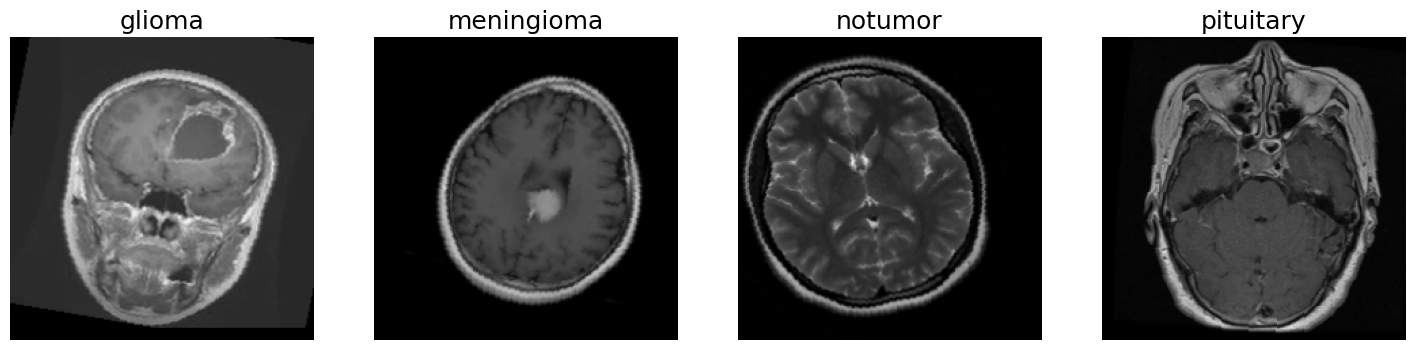

In [7]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np

def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.title(title, fontsize=18)   # <-- font size set to 18
    plt.axis('off')

# Find one image per class
examples = {}
for img, label in train_dataset:
    if label not in examples:
        examples[label] = img
    if len(examples) == len(class_names):
        break

# Prepare images and titles sorted by label index
imgs = [examples[i] for i in range(len(class_names))]
titles = [class_names[i] for i in range(len(class_names))]

# Show images in one grid
plt.figure(figsize=(18, 4))
for i in range(len(class_names)):
    plt.subplot(1, len(class_names), i + 1)
    imshow(imgs[i], titles[i])
plt.show()


# ✅ Pipeline Recap: Hybrid Model
## == > ResNet18 → Feature Extraction → Local GAN (per client) → Aggregate Features → PCA → MLP Classifier → SHAP
-------------------------------------------------------------------------------
### == > FL simulation: Done with 3 clients.
### == > GAN: Generates synthetic features to augment imbalanced classes.
### == > PCA: Reduces 512D → 100D for efficient training & SHAP visualization.
### == > MLP: Final classifier trained on aggregated features.
### == > SHAP: Explains predictions for interpretability.

# Step 1 : Define ResNet18

In [8]:
# =========================
# Step 2: Define ResNet18 Model
# =========================
import torch
import torch.nn as nn
import torchvision.models as models

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)

# Load pretrained ResNet18
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# Modify the final fully connected layer for 4 classes
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(class_names))  # 4 outputs: glioma, meningioma, notumor, pituitary

model = model.to(device)

print("✅ ResNet18 ready with output classes:", len(class_names))


✅ Using device: cuda
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 214MB/s]


✅ ResNet18 ready with output classes: 4


# Step 3: Train ResNet18 on My  MRI dataset.

In [9]:
# =========================
# Step 3: Train ResNet18
# =========================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

# Device already defined in Step 2 as 'device'

# Hyperparameters
num_epochs = 10          # we can increase later
learning_rate = 1e-4
BATCH_SIZE = 16          # same as before

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# DataLoaders already defined as train_loader and test_loader

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / total
    train_acc = correct / total

    # Validation loop
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_loss = val_loss / val_total
    val_acc = val_correct / val_total

    print(f"\nEpoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}\n")

print("✅ ResNet18 training done!")


Epoch 1/10 - Training: 100%|██████████| 604/604 [01:32<00:00,  6.56it/s]



Epoch [1/10] Train Loss: 0.2633 | Train Acc: 0.9081 | Val Loss: 0.1929 | Val Acc: 0.9350



Epoch 2/10 - Training: 100%|██████████| 604/604 [01:28<00:00,  6.79it/s]



Epoch [2/10] Train Loss: 0.1099 | Train Acc: 0.9635 | Val Loss: 0.1577 | Val Acc: 0.9532



Epoch 3/10 - Training: 100%|██████████| 604/604 [01:29<00:00,  6.72it/s]



Epoch [3/10] Train Loss: 0.0906 | Train Acc: 0.9703 | Val Loss: 0.1290 | Val Acc: 0.9611



Epoch 4/10 - Training: 100%|██████████| 604/604 [01:29<00:00,  6.75it/s]



Epoch [4/10] Train Loss: 0.0785 | Train Acc: 0.9742 | Val Loss: 0.1263 | Val Acc: 0.9631



Epoch 5/10 - Training: 100%|██████████| 604/604 [01:29<00:00,  6.76it/s]



Epoch [5/10] Train Loss: 0.0524 | Train Acc: 0.9834 | Val Loss: 0.1161 | Val Acc: 0.9673



Epoch 6/10 - Training: 100%|██████████| 604/604 [01:29<00:00,  6.74it/s]



Epoch [6/10] Train Loss: 0.0551 | Train Acc: 0.9805 | Val Loss: 0.0967 | Val Acc: 0.9727



Epoch 7/10 - Training: 100%|██████████| 604/604 [01:30<00:00,  6.67it/s]



Epoch [7/10] Train Loss: 0.0352 | Train Acc: 0.9887 | Val Loss: 0.0791 | Val Acc: 0.9797



Epoch 8/10 - Training: 100%|██████████| 604/604 [01:29<00:00,  6.77it/s]



Epoch [8/10] Train Loss: 0.0434 | Train Acc: 0.9869 | Val Loss: 0.1207 | Val Acc: 0.9760



Epoch 9/10 - Training: 100%|██████████| 604/604 [01:30<00:00,  6.68it/s]



Epoch [9/10] Train Loss: 0.0372 | Train Acc: 0.9881 | Val Loss: 0.1004 | Val Acc: 0.9743



Epoch 10/10 - Training: 100%|██████████| 604/604 [01:29<00:00,  6.78it/s]



Epoch [10/10] Train Loss: 0.0346 | Train Acc: 0.9897 | Val Loss: 0.1161 | Val Acc: 0.9710

✅ ResNet18 training done!


# Step 4: Feature Extraction from Trained ResNet18
## ==> We use the trained ResNet18 without the final classification layer to extract features for each image. These features will be used for GAN, PCA, and interpretability.

In [10]:
# =========================
# Step 4: Extract Features using ResNet18
# =========================
import torch
from torch.utils.data import DataLoader, TensorDataset

# Remove final fc layer
feature_extractor = nn.Sequential(*list(model.children())[:-1])  # removes last fc
feature_extractor = feature_extractor.to(device)
feature_extractor.eval()

def extract_features(loader):
    all_features = []
    all_labels = []
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            feats = feature_extractor(images)
            feats = feats.view(feats.size(0), -1)  # flatten
            all_features.append(feats.cpu())
            all_labels.append(labels)
    return torch.cat(all_features), torch.cat(all_labels)

train_features, train_labels = extract_features(train_loader)
test_features, test_labels = extract_features(test_loader)

print("✅ Features extracted")
print("Train features shape:", train_features.shape)
print("Train labels shape:", train_labels.shape)


✅ Features extracted
Train features shape: torch.Size([9650, 512])
Train labels shape: torch.Size([9650])


# Step 5: Train Conditional GAN (cGAN) for Data Balancing
##   → Generator creates synthetic 512-D feature per class
##   → Discriminator ensures realism

In [11]:
# =========================
# Step 5: Conditional GAN for Feature Generation
# =========================
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

feature_dim = train_features.shape[1]
num_classes = len(class_names)
latent_dim = 128

# ------------------------
# Generator
# ------------------------
class Generator(nn.Module):
    def __init__(self, latent_dim=128, num_classes=4, feature_dim=512):
        super().__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + num_classes, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, feature_dim),
            nn.Tanh()
        )

    def forward(self, z, labels):
        c = self.label_emb(labels)
        x = torch.cat([z, c], dim=1)
        return self.model(x)

# ------------------------
# Discriminator
# ------------------------
class Discriminator(nn.Module):
    def __init__(self, num_classes=4, feature_dim=512):
        super().__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(feature_dim + num_classes, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, feat, labels):
        c = self.label_emb(labels)
        x = torch.cat([feat, c], dim=1)
        return self.model(x)

# ------------------------
# Initialize models and optimizers
# ------------------------
G = Generator(latent_dim, num_classes, feature_dim).to(device)
D = Discriminator(num_classes, feature_dim).to(device)

opt_G = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5,0.999))
opt_D = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5,0.999))
criterion = nn.BCELoss()

# ------------------------
# DataLoader for features
# ------------------------
train_dataset = TensorDataset(train_features, train_labels)
train_loader_feat = DataLoader(train_dataset, batch_size=32, shuffle=True)

# ------------------------
# Training Loop
# ------------------------
epochs = 100
for epoch in range(epochs):
    for feats, lbls in train_loader_feat:
        feats, lbls = feats.to(device), lbls.to(device)
        batch = feats.size(0)
        real, fake = torch.ones(batch,1).to(device), torch.zeros(batch,1).to(device)

        # Train Discriminator
        z = torch.randn(batch, latent_dim).to(device)
        gen_feats = G(z, lbls)
        D_loss = criterion(D(feats, lbls), real) + criterion(D(gen_feats.detach(), lbls), fake)
        opt_D.zero_grad()
        D_loss.backward()
        opt_D.step()

        # Train Generator
        z = torch.randn(batch, latent_dim).to(device)
        gen_feats = G(z, lbls)
        G_loss = criterion(D(gen_feats, lbls), real)
        opt_G.zero_grad()
        G_loss.backward()
        opt_G.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] | D_loss: {D_loss.item():.4f} | G_loss: {G_loss.item():.4f}")

print("✅ GAN training done!")


Epoch [10/100] | D_loss: 0.1377 | G_loss: 3.5492
Epoch [20/100] | D_loss: 0.0022 | G_loss: 7.9130
Epoch [30/100] | D_loss: 0.0014 | G_loss: 8.7864
Epoch [40/100] | D_loss: 0.0005 | G_loss: 11.1179
Epoch [50/100] | D_loss: 0.0598 | G_loss: 5.4324
Epoch [60/100] | D_loss: 0.0010 | G_loss: 10.2318
Epoch [70/100] | D_loss: 0.0005 | G_loss: 8.4406
Epoch [80/100] | D_loss: 0.0005 | G_loss: 8.8293
Epoch [90/100] | D_loss: 0.1332 | G_loss: 6.6956
Epoch [100/100] | D_loss: 0.0005 | G_loss: 9.1743
✅ GAN training done!


# ✅ Step 6: Build client datasets properly

In [12]:
# =========================
# Step 6: Build Client Datasets
# =========================
from torch.utils.data import Subset

num_clients = 3  # you can change to simulate more clients
dataset = TensorDataset(train_features, train_labels)

# deterministic split
dataset_len = len(dataset)
base_size = dataset_len // num_clients
sizes = [base_size] * num_clients
sizes[-1] += dataset_len - sum(sizes)

indices = list(range(dataset_len))
import random; random.seed(42); random.shuffle(indices)

start = 0
client_indices = []
for s in sizes:
    client_indices.append(indices[start:start+s])
    start += s

# build client datasets & loaders
client_loaders = []
client_datasets = []
for inds in client_indices:
    sub = Subset(dataset, inds)
    client_datasets.append(sub)
    loader = DataLoader(sub, batch_size=64, shuffle=True)
    client_loaders.append(loader)

print("✅ Client sizes:", [len(sub) for sub in client_datasets])


✅ Client sizes: [3216, 3216, 3218]


# ✅ Step 7: Real + Synthetic Features [ per Client ]
## ==> For each class label (0 → glioma, 1 → meningioma, …), generate 200 synthetic feature vectors.
## ==> Merge them with the client’s real ResNet18 features.
## == > Result → each client now holds augmented, balanced feature sets.





In [13]:
# =========================
# Step 7: Generate synthetic features & merge with real
# =========================

def generate_client_synthetic_features(G_model, num_samples_per_class=200):
    G_model.eval()
    synth_feats = []
    synth_labels = []
    with torch.no_grad():
        for label in range(num_classes):
            z = torch.randn(num_samples_per_class, latent_dim).to(device)
            lbls = torch.full((num_samples_per_class,), label, dtype=torch.long).to(device)
            gen_feats = G_model(z, lbls)
            synth_feats.append(gen_feats.cpu())
            synth_labels.append(lbls.cpu())
    return torch.cat(synth_feats), torch.cat(synth_labels)

client_features_list = []
client_labels_list = []

for i, loader in enumerate(client_loaders):
    real_feats_chunks = []
    real_lbls_chunks = []

    # collect ALL real features for this client
    with torch.no_grad():
        for feats_batch, lbls_batch in loader:
            real_feats_chunks.append(feats_batch)
            real_lbls_chunks.append(lbls_batch)

    real_feats = torch.cat(real_feats_chunks)
    real_lbls = torch.cat(real_lbls_chunks)

    # generate synthetic features (same size for each client)
    synth_feats, synth_lbls = generate_client_synthetic_features(G, num_samples_per_class=200)

    # combine real + synthetic
    client_feats = torch.cat([real_feats, synth_feats], dim=0)
    client_lbls = torch.cat([real_lbls, synth_lbls], dim=0)

    client_features_list.append(client_feats)
    client_labels_list.append(client_lbls)

print("✅ Prepared per-client feature sizes:", [cf.shape[0] for cf in client_features_list])


✅ Prepared per-client feature sizes: [4016, 4016, 4018]


# ✅ Step 8: Aggregate & Train/Test Split with Scaler + PCA
## ==> Aggregation + Dimensionality Reduction (PCA) [ PCA → 512D → 100 D ]
## Then == > 100-D features are used by your downstream MLP classifier.


In [14]:
# =========================
# Step 8: Aggregate & split into train/test (scaler + PCA on training only)
# =========================
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Aggregate all clients' features together
all_features_fl = torch.cat(client_features_list, dim=0).numpy()
all_labels_fl = torch.cat(client_labels_list, dim=0).numpy()
print("✅ Aggregated features overall:", all_features_fl.shape)

# Stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    all_features_fl, all_labels_fl, test_size=0.2, random_state=42, stratify=all_labels_fl
)

# Scale features (fit only on training set!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (fit only on training set!)
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("✅ Train PCA shape:", X_train_pca.shape, "Test PCA shape:", X_test_pca.shape)


✅ Aggregated features overall: (12050, 512)
✅ Train PCA shape: (9640, 100) Test PCA shape: (2410, 100)


# ✅ Step 9: Train MLP Classifier
## == > Using the 100 D classifier here

In [15]:
# =========================
# Step 9: Convert to tensors & train MLP
# =========================

# Convert to tensors
X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Define MLP Classifier
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=256, num_classes=num_classes):
        super(MLPClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, num_classes)
        )
    def forward(self, x):
        return self.net(x)

# Initialize model
clf = MLPClassifier(input_dim=X_train_pca.shape[1]).to(device)
optimizer = torch.optim.Adam(clf.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Training loop
epochs = 100
for epoch in range(epochs):
    clf.train()
    optimizer.zero_grad()
    outputs = clf(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        clf.eval()
        with torch.no_grad():
            preds = clf(X_test_tensor).argmax(dim=1)
            acc = (preds == y_test_tensor).float().mean().item()
        print(f"Epoch [{epoch+1}/{epochs}] | Loss: {loss.item():.4f} | Test Acc: {acc:.4f}")


Epoch [10/100] | Loss: 0.3827 | Test Acc: 0.9959
Epoch [20/100] | Loss: 0.1211 | Test Acc: 0.9983
Epoch [30/100] | Loss: 0.0530 | Test Acc: 0.9983
Epoch [40/100] | Loss: 0.0306 | Test Acc: 0.9988
Epoch [50/100] | Loss: 0.0221 | Test Acc: 0.9983
Epoch [60/100] | Loss: 0.0173 | Test Acc: 0.9979
Epoch [70/100] | Loss: 0.0138 | Test Acc: 0.9979
Epoch [80/100] | Loss: 0.0122 | Test Acc: 0.9979
Epoch [90/100] | Loss: 0.0117 | Test Acc: 0.9979
Epoch [100/100] | Loss: 0.0101 | Test Acc: 0.9979


# Step 10 : -- Confission Matrix

Accuracy : 0.9979
Precision: 0.9979
Recall   : 0.9979
F1-score : 0.9979

Classification Report:

              precision    recall  f1-score   support

     Class_0       1.00      1.00      1.00       724
     Class_1       1.00      0.99      1.00       556
     Class_2       1.00      1.00      1.00       509
     Class_3       1.00      1.00      1.00       621

    accuracy                           1.00      2410
   macro avg       1.00      1.00      1.00      2410
weighted avg       1.00      1.00      1.00      2410



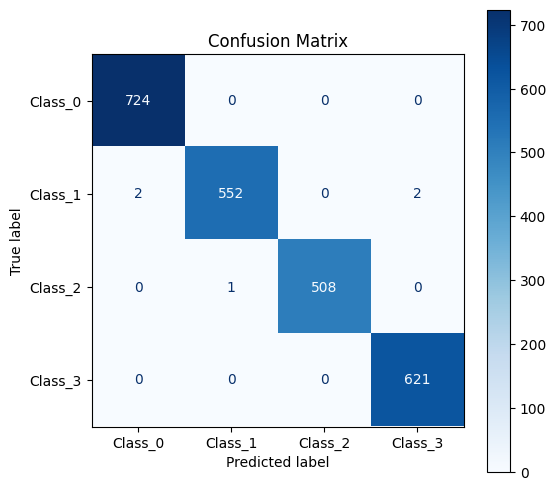

In [16]:
# =========================
# Predictions, Metrics & Confusion Matrix (Fixed for GPU/CPU)
# =========================
import torch
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt
import numpy as np

# Ensure model is on device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
clf = clf.to(device)

# Make sure test tensors are on the same device
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

# -------------------------
# Predictions
# -------------------------
clf.eval()
with torch.no_grad():
    y_pred = clf(X_test_tensor).argmax(dim=1).cpu().numpy()  # move only final output to CPU
    y_true = y_test_tensor.cpu().numpy()

# -------------------------
# Accuracy, Precision, Recall, F1
# -------------------------
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

# -------------------------
# Classification Report
# -------------------------
print("Classification Report:\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=[f"Class_{i}" for i in np.unique(y_true)]
))

# -------------------------
# Confusion Matrix
# -------------------------
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=[f"Class_{i}" for i in np.unique(y_true)])

plt.figure(figsize=(6,6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()


# 🔹 Step 11: Track Training Loss & Validation Accuracy of MLP (FL + GAN + PCA stage)

In [17]:
# =========================
# Step 11: Track Loss & Accuracy per Epoch
# =========================

train_losses, val_accuracies = [], []

epochs = 50
for epoch in range(epochs):
    # ---- Training ----
    clf.train()
    optimizer.zero_grad()
    outputs = clf(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # ---- Validation ----
    clf.eval()
    with torch.no_grad():
        preds = clf(X_test_tensor).argmax(dim=1)
        acc = (preds == y_test_tensor).float().mean().item()
        val_accuracies.append(acc)

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {loss.item():.4f} | Val Acc: {acc:.4f}")


Epoch [10/50] | Train Loss: 0.0098 | Val Acc: 0.9979
Epoch [20/50] | Train Loss: 0.0082 | Val Acc: 0.9979
Epoch [30/50] | Train Loss: 0.0076 | Val Acc: 0.9979
Epoch [40/50] | Train Loss: 0.0070 | Val Acc: 0.9979
Epoch [50/50] | Train Loss: 0.0065 | Val Acc: 0.9979


# 🔹 Step 12: Plot Loss Curve & Validation Accuracy

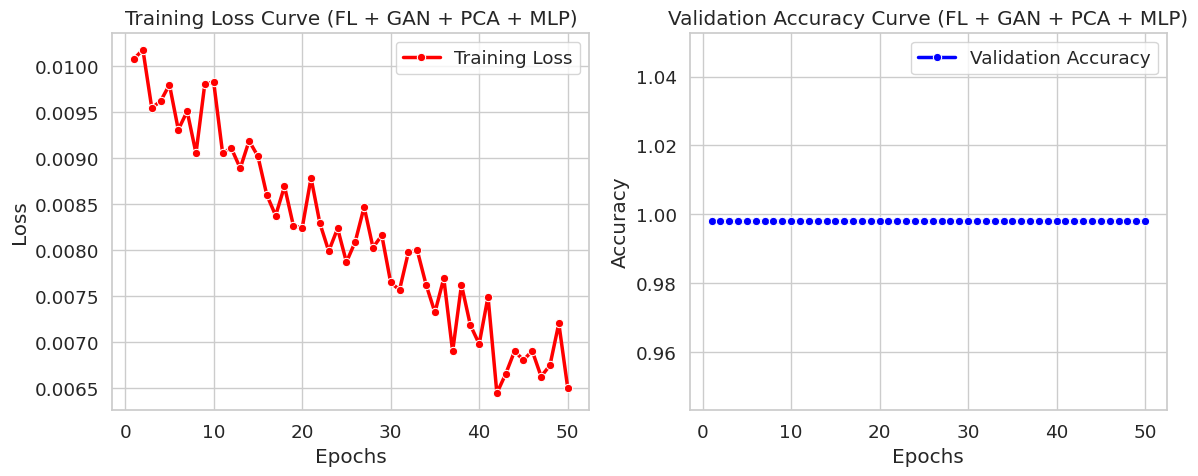

In [31]:
# =========================
# Step 13: Plot Training Curves (Seaborn style)
# =========================
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for better aesthetics
sns.set_theme(style="whitegrid", font_scale=1.2)

epochs_range = range(1, epochs+1)

plt.figure(figsize=(12,5))

# Training Loss
plt.subplot(1,2,1)
sns.lineplot(x=epochs_range, y=train_losses, color="red", linewidth=2.5, marker="o", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve (FL + GAN + PCA + MLP)")
plt.legend()

# Validation Accuracy
plt.subplot(1,2,2)
sns.lineplot(x=epochs_range, y=val_accuracies, color="blue", linewidth=2.5, marker="o", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Curve (FL + GAN + PCA + MLP)")
plt.legend()

plt.tight_layout()
plt.show()


# Save the Matrix

In [35]:
import pandas as pd

results_df = pd.DataFrame({
    "Epoch": epochs_range,
    "Train_Loss": train_losses,
    "Val_Accuracy": val_accuracies
})

results_df.to_csv("training_metrics.csv", index=False)
print("✅ Training metrics saved to training_metrics.csv")


✅ Training metrics saved to training_metrics.csv


# Step 13 : Grad-Cam Implemantaion
#### --> Use this to visualize spatial regions in an MRI that the ResNet18 used to predict a class.

#### Key points:
------------
#### => We attach hooks to the last convolutional block (layer4) to get activations and gradients.
#### => We compute the CAM and overlay it on the original image.
#### =>  We ensure grayscale images become 3-channel (repeated) so ResNet receives the correct shape.

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1866: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


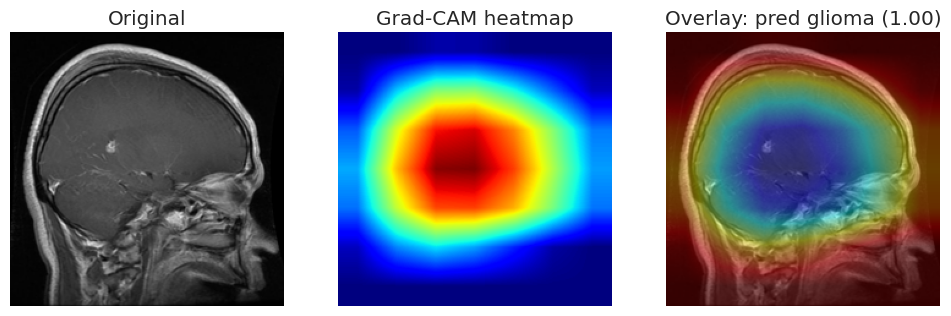

In [36]:

# -----------------------
# Grad-CAM helper & demo
# -----------------------
import cv2
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import transforms
import matplotlib.pyplot as plt

# Make sure model is in eval mode
model.eval()
model = model.to(device)

# Preprocess function used for Grad-CAM (matches training transforms but ensures 3 channels)
def preprocess_for_resnet_pil(pil_img):
    # pil_img: PIL.Image
    # apply resize + ToTensor + normalize (matching your train/test pipeline)
    # but ensure 3 channels for ResNet
    t = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),
        # If your training used single-channel Normalize([0.5]), we keep same centering.
        # but repeat channel to 3 for ResNet.
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
    x = t(pil_img)            # shape: [C, H, W] (maybe C=1)
    if x.shape[0] == 1:
        x = x.repeat(3,1,1)   # repeat grayscale to 3 channels
    return x.unsqueeze(0)    # add batch dim

# Grad-CAM implementation for ResNet18
gradients = None
activations = None

def save_gradients(module, grad_in, grad_out):
    global gradients
    gradients = grad_out[0].detach()

def save_activations(module, input, output):
    global activations
    activations = output.detach()

# Register hooks on last conv layer (ResNet layer4)
target_layer = model.layer4[-1].conv2
handle_a = target_layer.register_forward_hook(save_activations)
handle_g = target_layer.register_backward_hook(save_gradients)

def grad_cam_for_image(pil_img, target_class=None):
    global gradients, activations
    gradients = None
    activations = None

    x = preprocess_for_resnet_pil(pil_img).to(device)  # shape [1,3,H,W]
    x.requires_grad = True

    # Forward
    output = model(x)  # logits
    probs = F.softmax(output, dim=1)
    pred_class = output.argmax(dim=1).item()
    if target_class is None:
        target_class = pred_class

    # Backward: score for target class
    model.zero_grad()
    score = output[0, target_class]
    score.backward(retain_graph=True)

    # gradients: [N, C, H, W] ; activations: [N, C, H, W]
    grads = gradients[0]       # [C, H, W]
    acts = activations[0]      # [C, H, W]

    # Global average pooling of gradients -> weights
    weights = grads.mean(dim=(1,2))  # [C]

    # Weighted combination of activations
    cam = (weights.unsqueeze(1).unsqueeze(2) * acts).sum(dim=0).cpu().numpy()

    # ReLU and normalize
    cam = np.maximum(cam, 0)
    cam = cam - cam.min()
    cam = cam / (cam.max() + 1e-8)
    cam = cv2.resize(cam, (IMG_SIZE, IMG_SIZE))

    # Prepare overlay
    # Convert original PIL to numpy for plotting
    orig = np.array(pil_img.resize((IMG_SIZE, IMG_SIZE))).astype(np.uint8)
    if orig.ndim == 2:  # grayscale
        orig_color = cv2.cvtColor(orig, cv2.COLOR_GRAY2RGB)
    else:
        orig_color = orig[..., :3]

    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(heatmap, 0.4, orig_color, 0.6, 0)

    return cam, orig_color, overlay, pred_class, probs[0, pred_class].item()

# Example: take one image from the test folder by index
from PIL import Image
# adjust index as desired
sample_idx = 10
img_path, label = test_dataset.samples[sample_idx]  # test_dataset is torchvision ImageFolder (if available)
pil = Image.open(img_path).convert('L')  # ensure grayscale — we'll convert inside preprocess
cam, orig, overlay, pred_cls, prob = grad_cam_for_image(pil, target_class=None)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.title("Original"); plt.axis('off'); plt.imshow(orig)
plt.subplot(1,3,2); plt.title("Grad-CAM heatmap"); plt.axis('off'); plt.imshow(cam, cmap='jet')
plt.subplot(1,3,3); plt.title(f"Overlay: pred {class_names[pred_cls]} ({prob:.2f})"); plt.axis('off'); plt.imshow(overlay)
plt.show()

# remove hooks
handle_a.remove(); handle_g.remove()

#✅  Step 14:  SHAP (explain your MLP on PCA features)
------------------------------------------------------
#### We'll explain predictions of your clf (PyTorch MLP) that consumes 100-D PCA features. I provide a reliable model-agnostic approach using SHAP KernelExplainer (works with any model) and also note how to use DeepExplainer if you prefer speed and have GPU support (DeepExplainer sometimes misbehaves with PyTorch models — KernelExplainer is slower but robust for small sample sizes).

#### Important: KernelExplainer is expensive for high-dimensional inputs. I use a small sample for explanation (e.g., explain first 20 test samples). Use nsamples small in shap_values calls.



# For Shap Implementaiton

In [37]:
!pip install shap lime


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283913 sha256=305e115bf4edde67849a5b43a9548f72f8591295016403d35cd31b453c49faf1
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


✅ SHAP values computed for test sample


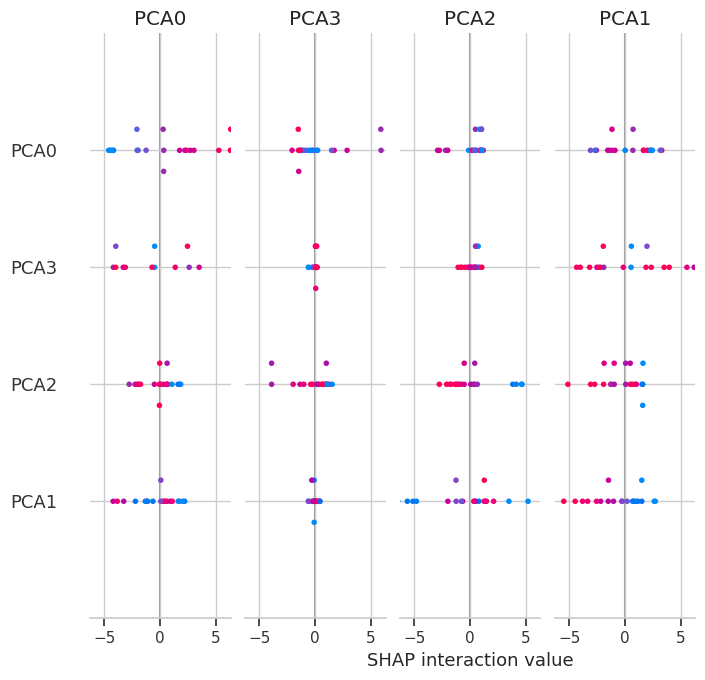

In [38]:
# =========================
# Step 10: SHAP Explainability
# =========================
import shap

# Wrap model for SHAP
clf.eval()

# Background: use a small subset of training data
background_size = 200
background = X_train_tensor[:background_size]

# Test sample to explain (first 20 test samples)
test_sample = X_test_tensor[:20]

# SHAP Explainer (DeepExplainer works with PyTorch models)
explainer = shap.DeepExplainer(clf, background)
shap_values = explainer.shap_values(test_sample)

print("✅ SHAP values computed for test sample")

# Plot summary (bar chart of top PCA features)
shap.summary_plot(shap_values, test_sample.cpu().numpy(), feature_names=[f"PCA{i}" for i in range(X_train_pca.shape[1])])


/tmp/ipython-input-1877623639.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shap_df_top, x="Importance", y="Feature", palette="viridis")


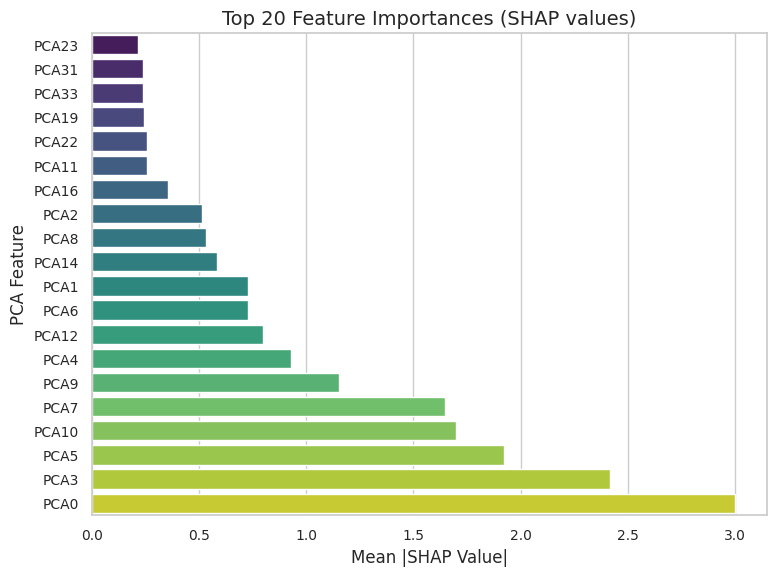

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert SHAP values (list) to numpy array if multi-class
if isinstance(shap_values, list):
    shap_values_np = shap_values[0]  # choose one class
else:
    shap_values_np = shap_values

# Mean absolute SHAP values across samples → 1D array
shap_importance = np.abs(shap_values_np).mean(axis=0).flatten()

# Create DataFrame
feature_names = [f"PCA{i}" for i in range(len(shap_importance))]
shap_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": shap_importance
}).sort_values("Importance", ascending=False)

# 🔑 Select Top 20 features only
top_k = 20
shap_df_top = shap_df.head(top_k).sort_values("Importance", ascending=True)  # ascending for nicer barplot

# Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=shap_df_top, x="Importance", y="Feature", palette="viridis")

plt.title(f"Top {top_k} Feature Importances (SHAP values)", fontsize=14)
plt.xlabel("Mean |SHAP Value|", fontsize=12)
plt.ylabel("PCA Feature", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2158776230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=shap_df_top, x="Importance", y="Feature", palette="viridis")


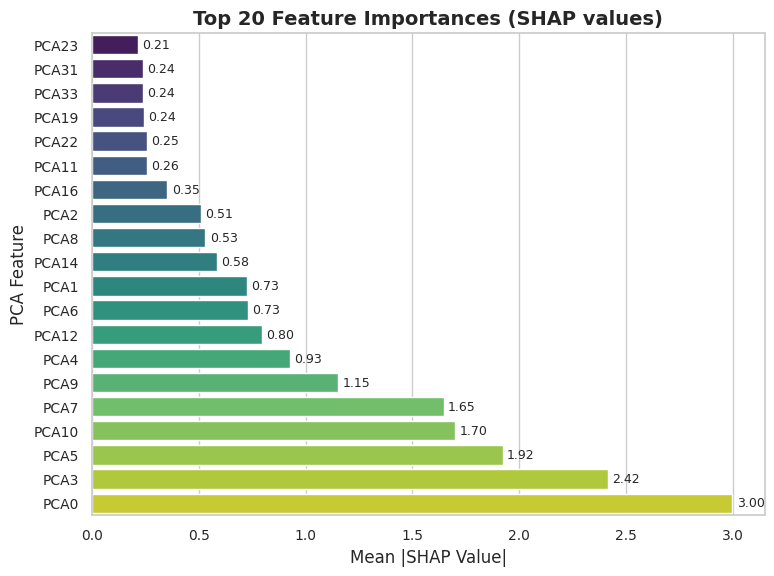

In [40]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=shap_df_top, x="Importance", y="Feature", palette="viridis")

# Add value labels
for p in ax.patches:
    ax.text(p.get_width() + 0.02, p.get_y() + p.get_height()/2,
            f"{p.get_width():.2f}", va='center', fontsize=9)

plt.title(f"Top {top_k} Feature Importances (SHAP values)", fontsize=14, weight='bold')
plt.xlabel("Mean |SHAP Value|", fontsize=12)
plt.ylabel("PCA Feature", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


/tmp/ipython-input-177512391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


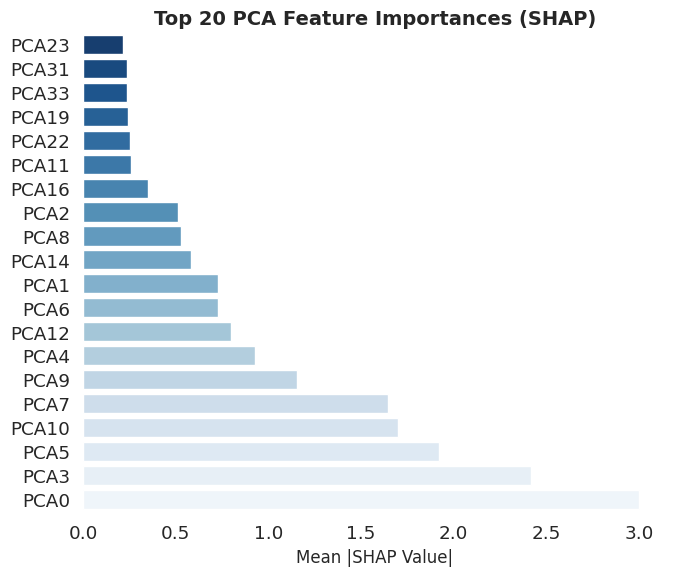

In [41]:
plt.figure(figsize=(7, 6))
ax = sns.barplot(
    data=shap_df_top,
    x="Importance", y="Feature",
    palette="Blues_r"  # clean monotone style
)

# Style improvements
sns.despine(left=True, bottom=True)  # remove borders
ax.grid(False)                       # remove grid
plt.title(f"Top {top_k} PCA Feature Importances (SHAP)", fontsize=14, weight='bold')
plt.xlabel("Mean |SHAP Value|", fontsize=12)
plt.ylabel("")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2279919023.py:2: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(


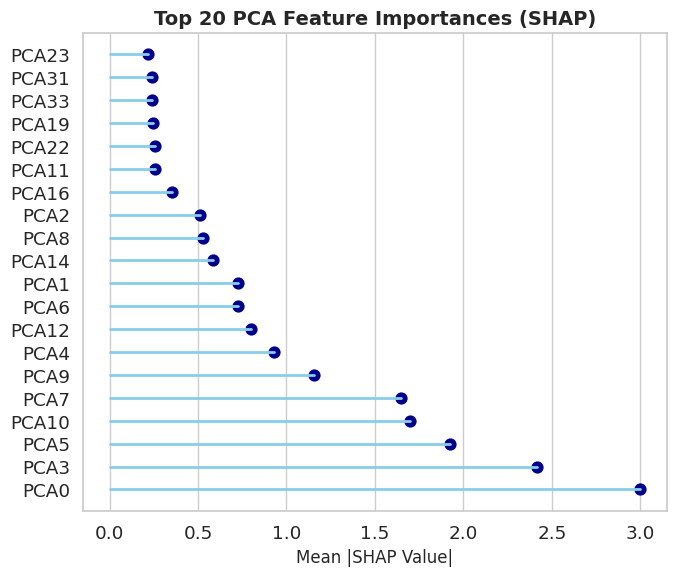

In [42]:
plt.figure(figsize=(7, 6))
ax = sns.pointplot(
    data=shap_df_top,
    x="Importance", y="Feature",
    join=False, color="darkblue"
)
for i, val in enumerate(shap_df_top["Importance"]):
    ax.plot([0, val], [i, i], color="skyblue", lw=2)

plt.title(f"Top {top_k} PCA Feature Importances (SHAP)", fontsize=14, weight='bold')
plt.xlabel("Mean |SHAP Value|", fontsize=12)
plt.ylabel("")
plt.tight_layout()
plt.show()


# 🧠 # =========================
#  Standalone SHAP Explainability Visualization (MLP + PCA)
# =========================

✅ SHAP shape after fix: (200, 100)


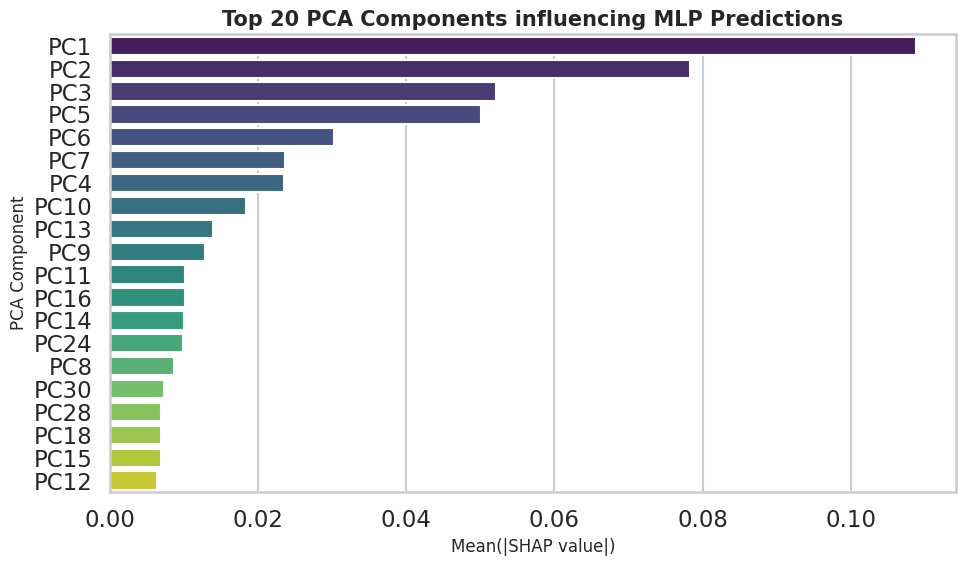

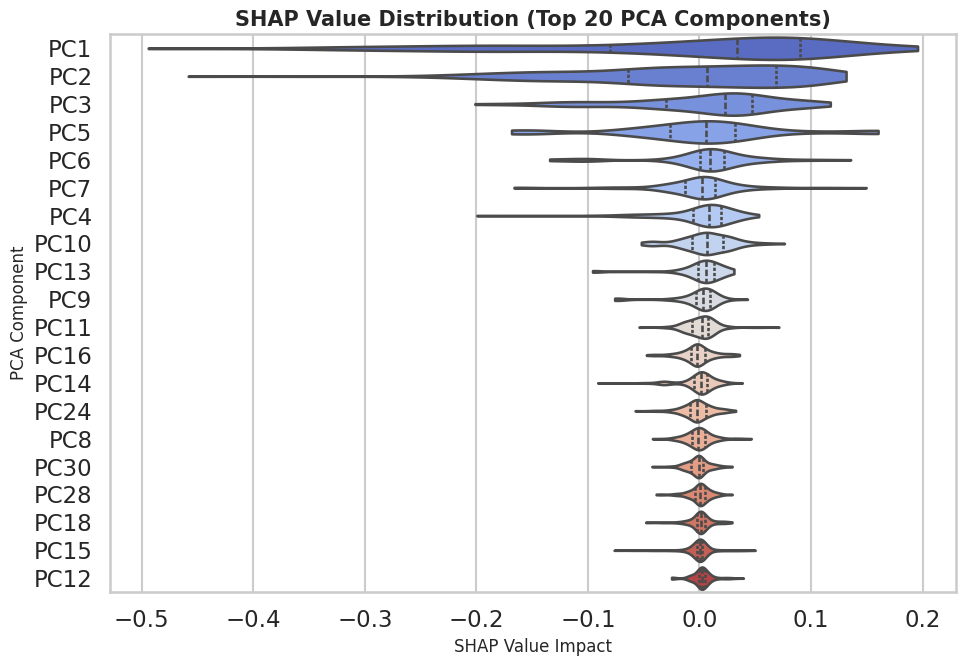

In [43]:
# =========================
# Step 10: SHAP Explainability for MLP (Seaborn Visualization — Clean & Final)
# =========================

import shap
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd

# Set Seaborn style
sns.set_theme(style="whitegrid", context="talk")

# Suppress warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Use CPU for SHAP (avoid GPU memory issues)
device_cpu = torch.device("cpu")
clf_cpu = clf.to(device_cpu)

# Take smaller subset for SHAP (to reduce memory)
X_train_sample = X_train_tensor[:200].to(device_cpu)
X_test_sample = X_test_tensor[:200].to(device_cpu)

# Initialize SHAP DeepExplainer
explainer = shap.DeepExplainer(clf_cpu, X_train_sample)
shap_values = explainer.shap_values(X_test_sample)

# =========================
# ✅ Handle multi-class SHAP properly
# =========================
if isinstance(shap_values, list):
    shap_values_np = np.mean(np.stack(shap_values, axis=-1), axis=-1)
else:
    shap_values_np = shap_values

if shap_values_np.ndim == 3:
    shap_values_np = shap_values_np.mean(axis=2)

print(f"✅ SHAP shape after fix: {shap_values_np.shape}")

# =========================
# Compute mean absolute SHAP importance
# =========================
shap_importance = np.abs(shap_values_np).mean(axis=0).flatten()
pca_importance_df = pd.DataFrame({
    'PCA_Component': [f'PC{i+1}' for i in range(len(shap_importance))],
    'Mean |SHAP|': shap_importance
}).sort_values(by='Mean |SHAP|', ascending=False)

# =========================
# 🔹 Plot 1: SHAP Feature Importance Barplot
# =========================
plt.figure(figsize=(10,6))
sns.barplot(
    x='Mean |SHAP|',
    y='PCA_Component',
    data=pca_importance_df.head(20),
    palette='viridis'
)
plt.title("Top 20 PCA Components influencing MLP Predictions", fontsize=15, weight='bold')
plt.xlabel("Mean(|SHAP value|)", fontsize=12)
plt.ylabel("PCA Component", fontsize=12)
plt.tight_layout()
plt.show()

# =========================
# 🔹 Plot 2: Clean Seaborn SHAP Summary (Ordered + Color-coded)
# =========================
# Match PCA shape
X_test_pca_sample = X_test_pca[:len(shap_values_np)]

# Build long-form DataFrame
shap_long_df = pd.DataFrame(shap_values_np, columns=[f"PC{i+1}" for i in range(X_test_pca_sample.shape[1])])
shap_long_df["Sample"] = np.arange(len(X_test_pca_sample))
melted_df = shap_long_df.melt(id_vars="Sample", var_name="PCA_Component", value_name="SHAP_Value")

# Keep only top 20 components (same as bar plot)
top20 = pca_importance_df.head(20)["PCA_Component"]
melted_df = melted_df[melted_df["PCA_Component"].isin(top20)]

# Sort components by importance order
melted_df["PCA_Component"] = pd.Categorical(
    melted_df["PCA_Component"],
    categories=top20,
    ordered=True
)

# Seaborn swarm-like summary
plt.figure(figsize=(10,7))
sns.violinplot(
    data=melted_df,
    y="PCA_Component",
    x="SHAP_Value",
    palette="coolwarm",
    inner="quartile",
    scale="width",
    cut=0
)
plt.title("SHAP Value Distribution (Top 20 PCA Components)", fontsize=15, weight='bold')
plt.xlabel("SHAP Value Impact", fontsize=12)
plt.ylabel("PCA Component", fontsize=12)
plt.tight_layout()
plt.show()


# Step 15 : Lime Implementaitaiton
###->  I'll show image LIME for ResNet18 predictions (gives superpixel explanations), and also show a short example for tabular LIME (MLP on PCA)

  0%|          | 0/500 [00:00<?, ?it/s]

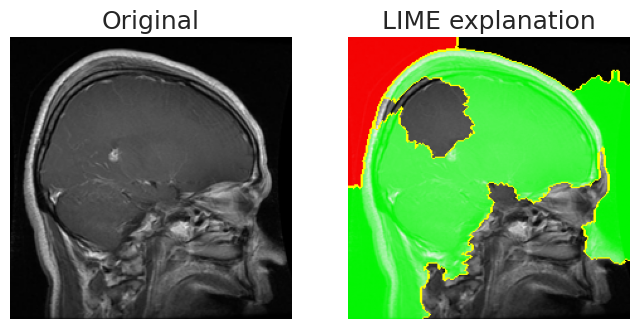

In [44]:
# -----------------------
# LIME image explainer on ResNet
# -----------------------
from lime import lime_image
import numpy as np
from skimage.segmentation import mark_boundaries
from PIL import Image

# wrapper: lime expects a function that takes a batch of images in (H,W,3) uint8 or float [0,1] and returns probs
def resnet_predict_for_lime(images_np_batch):
    # images_np_batch: list/array shape (N, H, W, 3) in uint8 or float
    out_probs = []
    for img_np in images_np_batch:
        # convert to PIL then preprocess like training
        pil = Image.fromarray(img_np.astype(np.uint8)).convert('L')  # original data is grayscale
        # reuse preprocess function from Grad-CAM (ensures 3 channels)
        x = preprocess_for_resnet_pil(pil).to(device)  # shape [1,3,H,W]
        with torch.no_grad():
            logits = model(x)
            probs = torch.softmax(logits, dim=1).cpu().numpy()[0]
        out_probs.append(probs)
    return np.array(out_probs)

# pick a sample from test dataset
sample_idx = 10
img_path, label = test_dataset.samples[sample_idx]
pil = Image.open(img_path).convert('L')
orig_rgb = np.array(pil.resize((IMG_SIZE, IMG_SIZE)))
if orig_rgb.ndim == 2:
    orig_rgb = np.stack([orig_rgb]*3, axis=2)

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(orig_rgb,          # the image
                                         classifier_fn=resnet_predict_for_lime,
                                         top_labels=4,
                                         hide_color=0,
                                         num_samples=500)   # more samples -> more stable, slower

# get explanation for predicted label
pred_label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(pred_label, positive_only=False, num_features=10, hide_rest=False)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1); plt.title("Original"); plt.axis('off'); plt.imshow(orig_rgb)
plt.subplot(1,2,2); plt.title("LIME explanation"); plt.axis('off'); plt.imshow(mark_boundaries(temp/255.0, mask))
plt.show()
